In [2]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
end = dt.datetime.now()
start = dt.date(end.year - 4, end.month,end.day)

cryptolist = ['BTC-USD','ETH-USD','XRP-USD','DOGE-USD','ZIL-USD']

In [4]:
df = reader.get_data_yahoo(cryptolist,start,end)['Adj Close']

In [5]:
df

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Date,,,,,
2018-10-25,6476.290039,202.718994,0.458052,0.003717,0.034607
2018-10-26,6474.750000,203.328995,0.459288,0.003984,0.036382
2018-10-27,6480.379883,204.210007,0.456348,0.004195,0.035265
2018-10-28,6486.390137,205.365997,0.462406,0.004063,0.035877
2018-10-29,6332.629883,197.246994,0.441514,0.003847,0.033682
...,...,...,...,...,...
2022-10-20,19053.740234,1283.200928,0.448084,0.059536,0.029119
2022-10-21,19172.468750,1299.946411,0.461098,0.059334,0.029279
2022-10-22,19208.189453,1314.299194,0.465470,0.059694,0.029247


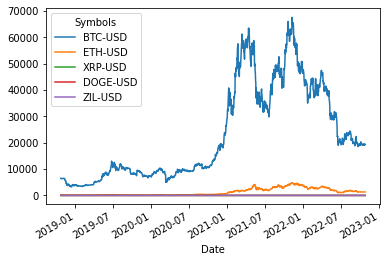

In [6]:
df.plot()
plt.show()

#To compare Cryptos we have to work with returns and not absolute prices

In [7]:
df['ZIL-USD'] = df['ZIL-USD'].fillna(0)

In [8]:
daily_returns = df.pct_change().dropna(axis=0)

In [9]:
daily_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Date,,,,,
2018-10-26,-0.000238,0.003009,0.002698,0.071832,0.051290
2018-10-27,0.000870,0.004333,-0.006401,0.052962,-0.030702
2018-10-28,0.000927,0.005661,0.013275,-0.031466,0.017354
2018-10-29,-0.023705,-0.039534,-0.045181,-0.053163,-0.061181
2018-10-30,0.000259,0.001567,0.007350,0.000780,0.022564
...,...,...,...,...,...
2022-10-20,-0.004483,-0.001978,-0.006965,0.014017,-0.013317
2022-10-21,0.006231,0.013050,0.029044,-0.003393,0.005495
2022-10-22,0.001863,0.011041,0.009482,0.006067,-0.001093


Now we need to cumulate these returns to make cryptos comparable

In [10]:
daily_cum_returns = (daily_returns + 1).cumprod() -1

In [11]:
daily_cum_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Date,,,,,
2018-10-26,-0.000238,0.003009,0.002698,0.071832,0.051290
2018-10-27,0.000632,0.007355,-0.003720,0.128598,0.019013
2018-10-28,0.001560,0.013057,0.009505,0.093086,0.036698
2018-10-29,-0.022182,-0.026993,-0.036105,0.034974,-0.026729
2018-10-30,-0.021929,-0.025469,-0.029021,0.035782,-0.004768
...,...,...,...,...,...
2022-10-20,1.942076,5.329949,-0.021762,15.017218,-0.158581
2022-10-21,1.960409,5.412554,0.006650,14.962873,-0.153957
2022-10-22,1.965925,5.483355,0.016195,15.059726,-0.154882


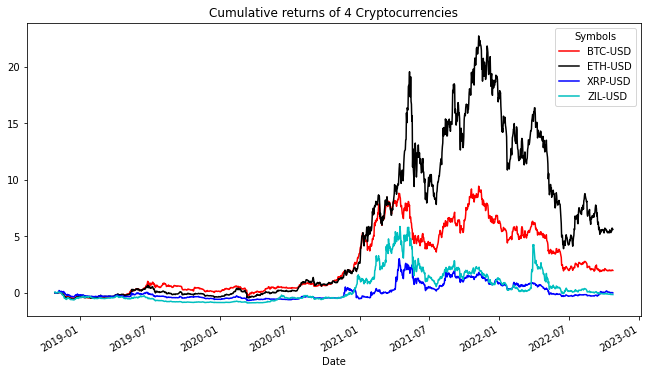

In [12]:
colors = ['r','k','b', 'c']

daily_cum_returns.drop(columns='DOGE-USD').plot(color=colors, figsize=(11,6))
plt.title('Cumulative returns of 4 Cryptocurrencies')
plt.show()

Cryptocurrency price charts over the last 4 years

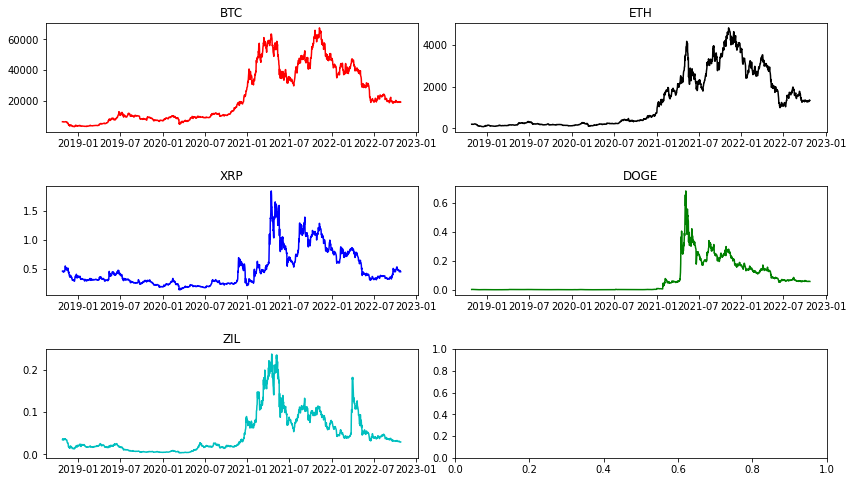

In [13]:
fig, axs = plt.subplots(3, 2,figsize=(14,8), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0, 0].plot(df['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 1].plot(df['ETH-USD'], c='k')
axs[0, 1].set_title('ETH')
axs[1, 0].plot(df['XRP-USD'], c='b')
axs[1, 0].set_title('XRP')
axs[1, 1].plot(df['DOGE-USD'], c='g')
axs[1, 1].set_title('DOGE')
axs[2, 0].plot(df['ZIL-USD'], c='c')
axs[2, 0].set_title('ZIL')
plt.show()

Comparison of daily volitilities

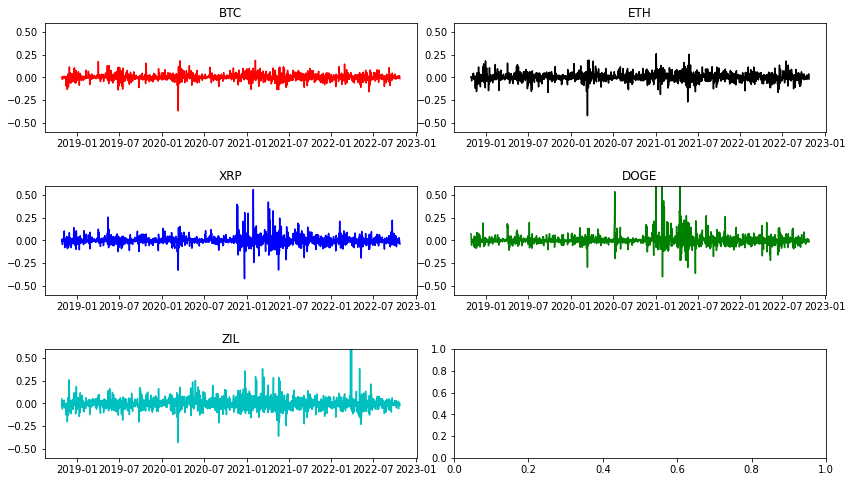

In [15]:
fig, axs = plt.subplots(3, 2,figsize=(14,8), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0, 0].plot(daily_returns['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 0].set_ylim([-0.6, 0.6])
axs[0, 1].plot(daily_returns['ETH-USD'], c='k')
axs[0, 1].set_title('ETH')
axs[0, 1].set_ylim([-0.6, 0.6])
axs[1, 0].plot(daily_returns['XRP-USD'], c='b')
axs[1, 0].set_title('XRP')
axs[1, 0].set_ylim([-0.6, 0.6])
axs[1, 1].plot(daily_returns['DOGE-USD'], c='g')
axs[1, 1].set_title('DOGE')
axs[1, 1].set_ylim([-0.6, 0.6])
axs[2, 0].plot(daily_returns['ZIL-USD'], c='c')
axs[2, 0].set_title('ZIL')
axs[2, 0].set_ylim([-0.6, 0.6])
plt.show()

How are returns distributed?

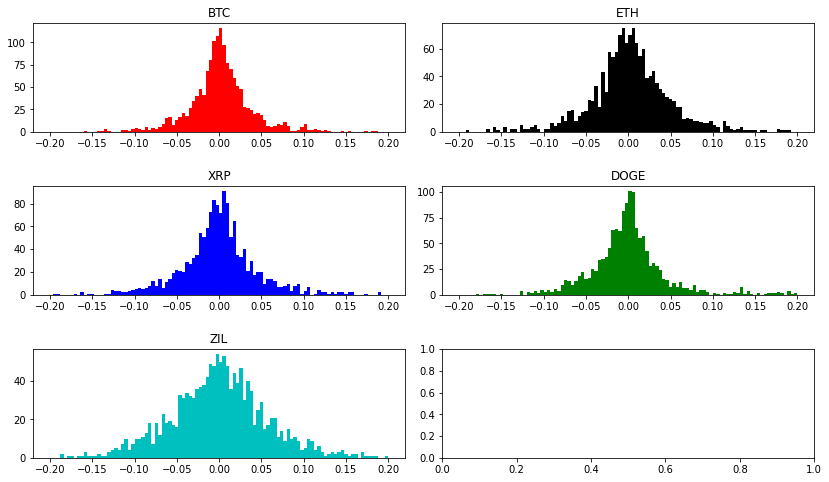

In [16]:
fig, axs = plt.subplots(3, 2,figsize=(14,8), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0, 0].hist(daily_returns['BTC-USD'], bins=100, color='r', range=(-0.2, 0.2))
axs[0, 0].set_title('BTC')
axs[0, 1].hist(daily_returns['ETH-USD'], bins=100, color='k', range=(-0.2, 0.2))
axs[0, 1].set_title('ETH')
axs[1, 0].hist(daily_returns['XRP-USD'], bins=100, color='b', range=(-0.2, 0.2))
axs[1, 0].set_title('XRP')
axs[1, 1].hist(daily_returns['DOGE-USD'], bins=100, color='g', range=(-0.2, 0.2))
axs[1, 1].set_title('DOGE')
axs[2, 0].hist(daily_returns['ZIL-USD'], bins=100, color='c', range=(-0.2, 0.2))
axs[2, 0].set_title('ZIL')

plt.show()

Extreme Returns

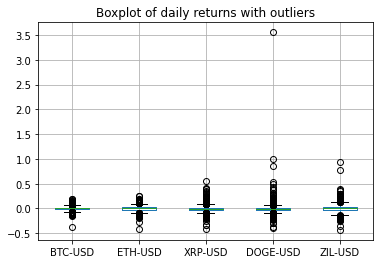

In [17]:
daily_returns.boxplot()
plt.title('Boxplot of daily returns with outliers')
plt.show()

Without outliers

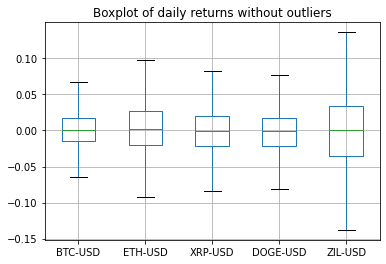

In [18]:
daily_returns.boxplot(showfliers=False)
plt.title('Boxplot of daily returns without outliers')
plt.show()

Correlations of cryptocurrency returns

In [19]:
daily_returns.corr()

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Symbols,,,,,
BTC-USD,1.000000,0.820702,0.589680,0.318637,0.550774
ETH-USD,0.820702,1.000000,0.636484,0.292046,0.582486
XRP-USD,0.589680,0.636484,1.000000,0.241193,0.456291
DOGE-USD,0.318637,0.292046,0.241193,1.000000,0.197941
ZIL-USD,0.550774,0.582486,0.456291,0.197941,1.000000


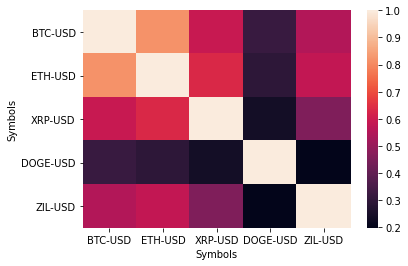

In [20]:
sns.heatmap(daily_returns.corr())
plt.show()

Let's backtest a forecasting module with Cryptos (BTC first)

In [21]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
end1 = dt.date(end.year - 1, end.month, end.day) #1 year back
end2 = dt.date(end.year, end.month - 6, end.day) #6 months back
start1 = dt.date(end1.year - 3, end.month, end.day)

In [23]:
df1 = reader.get_data_yahoo(cryptolist, start1, end1)['Adj Close']
df2 = reader.get_data_yahoo(cryptolist, start1, end2)['Adj Close']

In [24]:
modelfb1 = Prophet()
df1 = df1.reset_index()
df1[['ds', 'y']] = df1[['Date', 'BTC-USD']]
modelfb1.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
modelfb2 = Prophet()
df2 = df2.reset_index()
df2[['ds', 'y']] = df2[['Date', 'BTC-USD']]
modelfb2.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = modelfb1.make_future_dataframe(periods=365)

In [27]:
future1 = modelfb2.make_future_dataframe(periods=180)

In [28]:
forecast1 = modelfb1.predict(future)
forecast2 = modelfb2.predict(future1)

1 year prediction

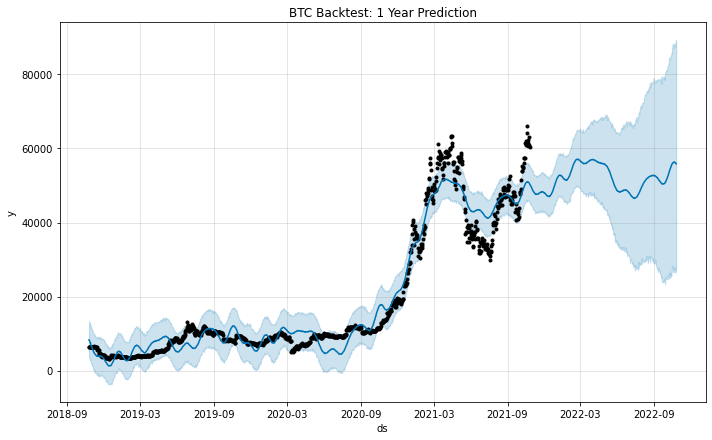

In [29]:
modelfb1.plot(forecast1)
plt.title('BTC Backtest: 1 Year Prediction')
plt.show()

6 month prediction

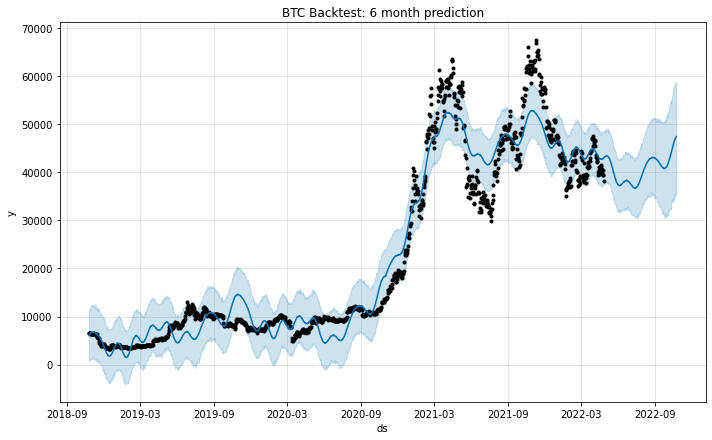

In [30]:
modelfb2.plot(forecast2)
plt.title('BTC Backtest: 6 month prediction')
plt.show()

Where is BTC going 6 months from now?

In [31]:
modelfb3 = Prophet()
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'BTC-USD']]
modelfb3.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future3 = modelfb3.make_future_dataframe(periods=180)

In [33]:
forecast3 = modelfb3.predict(future3)

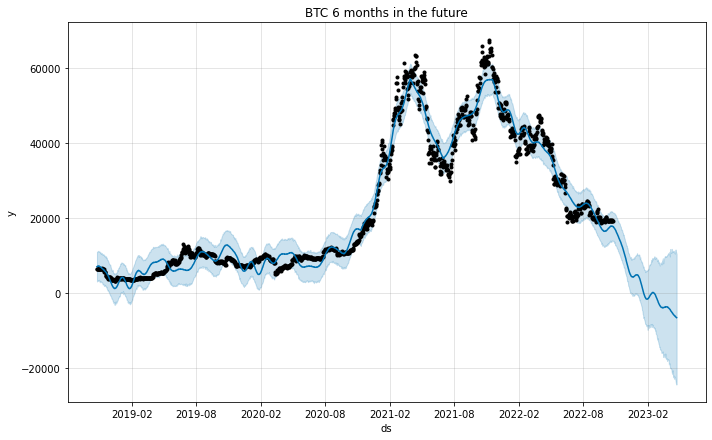

In [34]:
modelfb3.plot(forecast3)
plt.title('BTC 6 months in the future')
plt.show()

How about ETH 6 months in the future?

In [35]:
modelfb4 = Prophet()
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'ETH-USD']]
modelfb4.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future4 = modelfb4.make_future_dataframe(periods=180)

In [37]:
forecast4 = modelfb4.predict(future4)

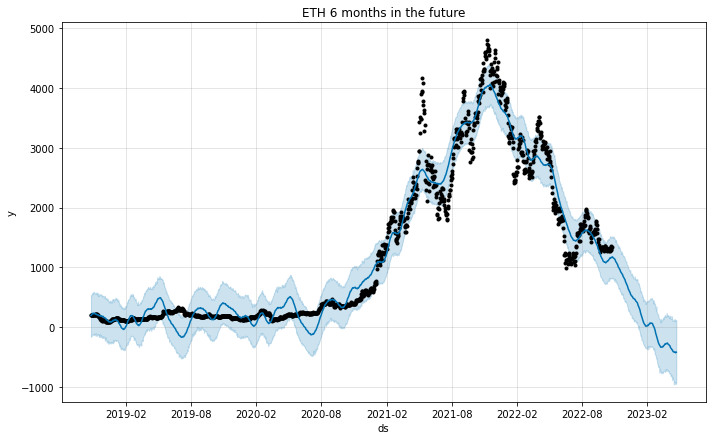

In [38]:
modelfb4.plot(forecast4)
plt.title('ETH 6 months in the future')
plt.show()

ETH 6 month backtest